In [16]:
import re
import xml.sax.saxutils as saxutils

from bs4 import BeautifulSoup

from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import GRU, LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from pandas import DataFrame
import pandas as pd
from random import random
import numpy as np
# Set Numpy random seed
np.random.seed(1)

In [17]:
data_folder = './ddd/'

# Dataset is cutom made for the following project to show multinomial categorization
    recognition -> 0
    detection = [hog,gaussian,graidents,contours,haar] -> 1
    corner detection = [harish,canny,sobel] -> 2
    similarity = [sift,surf] -> 3
    color = [rgb,hsv,thrsholding,histogram] -> 4
    mropholgy = [dilation] -> 5
    ocr = [ocr,tessarct] -> 6
    crop = [crop] -> 7
    transformation = [hemography,stitching] -> 8
    segementation = [segmentation,selective search] -> 9
    face detection = [face detection] -> 10

In [22]:
  
def to_category_vector(categories, target_categories):
    vector = np.zeros(len(target_categories)).astype(np.float32)
    
    for i in range(len(target_categories)):
        if target_categories[i] in categories:
            vector[i] = 1.0
    
    return vector

In [42]:

selected_categories = np.array( ['detection','recognition','corner detection','similarity','color','morphology','ocr',
                       'crop','transformation','segmentation','face detection','background','defects','none']
)

num_categories = 14


In [23]:
def strip_tags(text):
    return re.sub('<[^<]+?>', '', text).strip()

def unescape(text):
    return saxutils.unescape(text)
#             document_body = strip_tags(str(newsline('text')[0].text)).replace('reuter\n&#3;', '')
#             document_body = unescape(document_body)


In [25]:
hh = pd.read_csv('./ddd/qq_pos.csv',names=range(1))

In [1]:
selected_categories = ['detection','recognition','corner detection','similarity','color','morphology','ocr',
                       'crop','transformation','segmentation','face detection','background','defects','none']
document_Y = []

filepath = './ddd/labelsqq_pos.txt'  
with open(filepath) as fp:  
    line = fp.readline()
#     line = line.lower()
    cnt = 1
    while line:
#         print("Line {}: {}".format(cnt, line.strip()))
#         print(line)
        document_categories = []
#         print(len(line))
        if 'recognition' in line:
            document_categories.append('recognition')
            print('True')
            
        if 'detection' in line:
            document_categories.append('detection')
        if 'corner detection' in line:
            document_categories.append('corner detection')
            
        if 'similarity' in line:
            document_categories.append('similarity')
            
        if 'color' in line:
            document_categories.append('color')
        if 'morphology' in line:
            document_categories.append('morphology')
        if 'ocr' in line:
            document_categories.append('ocr')
        if 'crop' in line:
            document_categories.append('crop')
        if 'transformation' in line:
            document_categories.append('transformation')
        if 'face detection' in line:
            document_categories.append('face detection')
        if 'segmentation' in line:
            document_categories.append('segmentation')

        if 'background' in line:
            document_categories.append('background')
        if 'defects' in line:
            document_categories.append('defects')
        if 'none' in line:
            document_categories.append('none')


            
        print(document_categories)
        document_Y.append(to_category_vector(document_categories, selected_categories))
        line = fp.readline()
#         document_categories = []
        cnt += 1

In [13]:
document_X = []
for i in range(len(document_Y)):
    document_body = unescape(strip_tags(str(hh[0][i])))
    document_X.append(document_body)

array([1., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
document_Y[2]

array([0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
document_Y[16].max()

1.0

In [43]:
len(selected_categories)

14

In [44]:
print(document_X[22])
print(document_Y[22])

detection of coins (and fit ellipses) on an image \n
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [45]:
lemmatizer = WordNetLemmatizer()
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")
stop_words = set(stopwords.words("english"))
stop_words.add('want')
def cleanUpSentence(r, stop_words = None):
    r = r.lower().replace("<br />", " ")
    r = re.sub(strip_special_chars, "", r.lower())
    if stop_words is not None:
        words = word_tokenize(r)
        filtered_sentence = []
        for w in words:
            w = lemmatizer.lemmatize(w)
            if w not in stop_words:
                filtered_sentence.append(w)
        return " ".join(filtered_sentence)
    else:
        return r


In [46]:
totalX = []
totalY = np.array(document_Y)
for i, doc in enumerate(document_X):
    totalX.append(cleanUpSentence(doc, stop_words))

In [47]:
print(totalX[220])
print(totalY[220])

local descriptor comparison instance retrieval ransac visualization sift surf orb etc n
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [48]:
xLengths = [len(word_tokenize(x)) for x in totalX]
h = sorted(xLengths)  #sorted lengths
maxLength =h[len(h)-1]
print("max input length is: ",maxLength)

max input length is:  21


In [49]:
maxLength = h[int(len(h) * 0.70)]
print("70% cover input sequence length up to",maxLength)

70% cover input sequence length up to 8


In [50]:
max_vocab_size = 200000
input_tokenizer = Tokenizer(max_vocab_size)
input_tokenizer.fit_on_texts(totalX)
input_vocab_size = len(input_tokenizer.word_index) + 1
print("input_vocab_size:",input_vocab_size)
totalX = np.array(pad_sequences(input_tokenizer.texts_to_sequences(totalX), maxlen=maxLength))


input_vocab_size: 1183


In [81]:
totalX

array([[  3,  47,  12, ..., 275,   5,   1],
       [  0,   0,  48, ...,  13, 276,   1],
       [  0,   0,  54, ..., 462,  62,   1],
       ...,
       [  0,   0,   0, ...,   3, 144,   1],
       [  0,   0, 141, ...,   6, 460,   1],
       [  0,   0,  48, ...,  13, 276,   1]], dtype=int32)

In [101]:
embedding_dim = 300
model = Sequential()
model.add(Embedding(input_vocab_size, embedding_dim,input_length = maxLength))
model.add(GRU(300, dropout=0.6, return_sequences=True,activation='relu', recurrent_activation='hard_sigmoid'))
model.add(GRU(300, dropout=0.6))
model.add(Dense(14, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [102]:
history = model.fit(totalX, totalY, validation_split=0.05, batch_size=20, epochs=100)

Train on 579 samples, validate on 31 samples
Epoch 1/100
579/579 [==============================] - 2s 4ms/step - loss: 0.3781 - acc: 0.8937 - val_loss: 0.2837 - val_acc: 0.9078
Epoch 2/100
579/579 [==============================] - 1s 948us/step - loss: 0.2564 - acc: 0.9128 - val_loss: 0.2923 - val_acc: 0.9078
Epoch 3/100
579/579 [==============================] - 1s 1ms/step - loss: 0.2501 - acc: 0.9132 - val_loss: 0.2840 - val_acc: 0.9078
Epoch 4/100
579/579 [==============================] - 1s 958us/step - loss: 0.2359 - acc: 0.9161 - val_loss: 0.2789 - val_acc: 0.9124
Epoch 5/100
579/579 [==============================] - 1s 973us/step - loss: 0.2171 - acc: 0.9252 - val_loss: 0.2810 - val_acc: 0.9078
Epoch 6/100
579/579 [==============================] - 1s 975us/step - loss: 0.1997 - acc: 0.9338 - val_loss: 0.3096 - val_acc: 0.8963
Epoch 7/100
579/579 [==============================] - 1s 975us/step - loss: 0.1785 - acc: 0.9419 - val_loss: 0.3056 - val_acc: 0.9055
Epoch 8/100
57

In [142]:
## Saving the model
model.save_weights('model_nlp_weights.h5')

# Save the model architecture
with open('model_architecture.json', 'w') as f:
    f.write(model.to_json())

In [143]:
model.save('my_model.h5')
## Loading the model


In [2]:
from keras.models import load_model

model = load_model('my_model.h5')

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


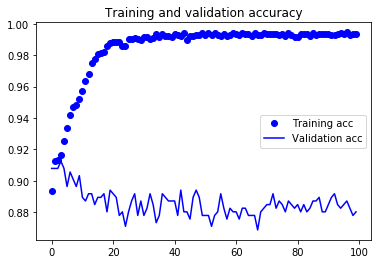

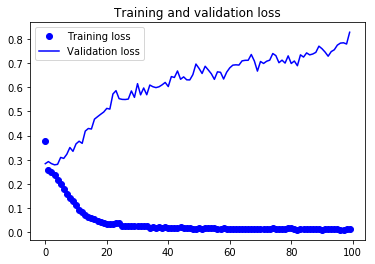

In [103]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [84]:
%matplotlib inline

In [102]:
# k = 1234
# doc220 = hh[0][600]
text = "so, I want the code for opencv which i am working for detection?"
doc220 = text

# print(document_Y[k])
input_x_220 = cleanUpSentence(doc220, stop_words)
print(input_x_220)


code opencv working detection


In [103]:
textArray = np.array(pad_sequences(input_tokenizer.texts_to_sequences([input_x_220]), maxlen=maxLength))
predicted = model.predict(textArray)[0]

In [107]:
for i, prob in enumerate(predicted):
#     print(i)
    if prob > 0.2:
        print(selected_categories[i])

none


In [131]:
predicted>0.6

array([ True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False])

In [132]:
predicted

array([0.7610231 , 0.03751443, 0.4859178 , 0.5366654 , 0.40908346,
       0.6962185 , 0.05766739, 0.16897568, 0.23509485, 0.2812517 ,
       0.09935365, 0.25982773, 0.581924  , 0.05464588], dtype=float32)

In [138]:
text = "hole filling?"